<a href="https://colab.research.google.com/github/jjyjung/ai/blob/gh-pages/ch9_blank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 9. 그래프 알고리즘

## 9.3. 그래프 탐색(Graph Traversal) - BSF & DFS

In [ ]:
mygraph = { "A" : {"B","C", "D"},
            "B" : {"A", "D"},
            "C" : {"A", "D", "F", "G"},
            "D" : {"A", "B", "C", "E"},
            "E" : {"D"},
            "F" : {"C", "G", "H"},
            "G" : {"C", "F", "H"},
            "H" : {"F", "G"}
          }

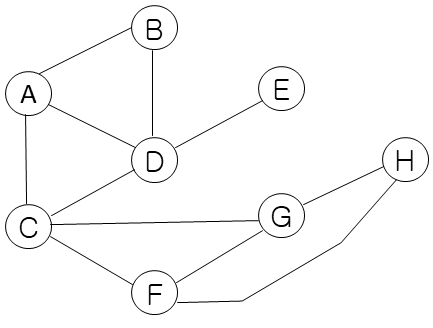

**[알고리즘 9-1] BFS (Breath-First Search) 알고리즘**

In [ ]:
import queue
def bfs(G, s):
    visited = {s}              	  # 맨 처음에는 start만 방문한 정점임
    Q = queue.Queue()             # 파이썬 큐 모듈의 큐 객체 생성
    Q.put(s)
    while not Q.empty():          # 큐에 항목이 있는 동안
        u = Q.get()               # 큐에서 하나의 정점 u를 빼냄
        print(u, end=" ")         # u는 방문했음을 출력
        L = G[u] - visited        # L = {u의 인접정점} - {방문정점}
        for v in L:               # 갈 수 있는 모든 인접 정점에 대해
            visited.add(v)        # 이제 u는 방문했음
            Q.put(v)              # u를 큐에 삽입

print("BFS : ", end="")
bfs(mygraph, "A")
print()

BFS : A C D B G F E H 


**[알고리즘 9-2] DFS (Depth-First Search) 알고리즘**

In [ ]:
def dfs(G, v, visited):			  # 깊이우선탐색 알고리즘
    if v not in visited :			# start가 방문하지 않은 정점이면
        visited.add(v)				# start를 방문한 노드 집합에 추가
        print(v, end=" ")			# start를 방문했다고 출력함
        L = G[v] - visited		# nbr: 차집합 연산 이용
        for x in L:						# v ∈ {인접정점} - {방문정점}
            dfs(G, x, visited) # v에 대해 dfs를 순환적으로 호출

print("DFS : ", end="")
dfs(mygraph, "A", set() )
print()

DFS : A C G H F D E B 


## 9.4. 최소신장트리 (Minimum Spanning Tree)


**[Slide] 프림(Prim) 알고리즘**

In [ ]:
def Prim(V, E, r) :
  d = {}
  for u in V:   # 진입간선 개수를 0으로 모두 초기화
    d[u] = 10000
  d[r] = 0

  visited = {r}; print(r, end=" ")
  S = {r}
  for v in E[r]:
    if (d[v] > E[r][v]):
      d[v] = E[r][v]
  print(d, end=" ")

  while len(V-S) > 0:
    y = extract_min(S, V-S, E)
    visited.add(y); print(y, end=" ")
    S.add(y)
    for v in E[y]:
      if (v not in S) and (d[v] > E[y][v]):
        d[v] = E[y][v]
    print(d, end=" ")
  print()
  return d

def extract_min(S, T, E):
  min = 1000
  for s in S:
    for t in T:
      if t in E[s]:
        if min > E[s][t]:
          y = t
          min = E[s][t]
          a = s; b = t
  print(":", a, "-", b)
  return y

V = {"A", "B", "C", "D", "E", "F", "G"}
E = { "A" : {"B":8,  "C":11, "D":9},
      "B" : {"E":10},
      "C" : {"A":11, "D":13, "F":8},
      "D" : {"A":9,  "C":13, "E":5, "G":12},
      "E" : {"B":10, "D":5},
      "F" : {"C":8,  "G":7},
      "G" : {"D":12, "F":7}
      }

print("Prim's Algorithm")
Prim(V, E, "A")

Prim's Algorithm
A {'C': 11, 'E': 10000, 'D': 9, 'F': 10000, 'A': 0, 'B': 8, 'G': 10000} : A - B
B {'C': 11, 'E': 10, 'D': 9, 'F': 10000, 'A': 0, 'B': 8, 'G': 10000} : A - D
D {'C': 11, 'E': 5, 'D': 9, 'F': 10000, 'A': 0, 'B': 8, 'G': 12} : D - E
E {'C': 11, 'E': 5, 'D': 9, 'F': 10000, 'A': 0, 'B': 8, 'G': 12} : A - C
C {'C': 11, 'E': 5, 'D': 9, 'F': 8, 'A': 0, 'B': 8, 'G': 12} : C - F
F {'C': 11, 'E': 5, 'D': 9, 'F': 8, 'A': 0, 'B': 8, 'G': 7} : F - G
G {'C': 11, 'E': 5, 'D': 9, 'F': 8, 'A': 0, 'B': 8, 'G': 7} 


{'A': 0, 'B': 8, 'C': 11, 'D': 9, 'E': 5, 'F': 8, 'G': 7}

**[알고리즘 9-5] 크루스칼(Kruskal) 알고리즘**

## 9.5. 위상정렬 (Topological Ordering)

**[알고리즘 9-6] 위상정렬 알고리즘1**





In [ ]:
import copy

def topological_sort1(W):  
  E = copy.deepcopy(W)				# 깊은 복사
  # 진입간선 Edge dictionary 구축
  IN = {}   # dictionary 초기화
  for i in E.keys():   # 진입간선 개수를 0으로 모두 초기화
    IN[i] = 0
  for v in E:
    for u in E[v]:    # 진입간선의 개수를 Graph에서 count함
      IN[u] += 1
  print(IN)

  A = []      # 위상정렬을 출력할 목록
  for k in range(len(V)):  # 한 번에 하나씩 A에 입력한다.
    for u in E:            # 모든 노드 중에서..
      if IN[u] == 0:       # 진입간선이 없으면 (진입간선 개수=0)
        A.append(u)        # u를 A에 추가합니다.
        for v in E[u]:     # 노드 u의 모든 도착노드를 찾아서..
          IN[v] -= 1       # 그 도착노드에서 진입간선 개수를 -1 합니다.
        E.pop(u)           # 노드 i를 E에서 삭제하고..
        break              # for i in N을 유지시키기 위하여, 한 번에 한 노드씩만 A에 추가합니다.
  return A

def printV(A, V):
  for a in A:
    print(V[a])  # 노드 Label을 출력함

# Graph 구조 저장하기
V = {0:"냄비에 물붓기", 1:"점화", 2:"라면 넣기", 3:"계란 풀어넣기", 4:"라면봉지 뜯기", 5:"스프 넣기"}
E = {0:{1}, 1:{2,3,5}, 2:{3}, 3:{}, 4:{2,5}, 5:{3}}  # 진출간선

A = topological_sort1(E)
printV(A, V)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 0, 5: 2}
냄비에 물붓기
점화
라면봉지 뜯기
라면 넣기
스프 넣기
계란 풀어넣기


## 9.6. 최단경로 (Shortest Path)

**[알고리즘 9-8] 다익스트라(Dijkstra) 알고리즘**

In [ ]:
def Dijkstra(V, E, r):
  S = set()
  d = {}
  for u in V:   # 진입간선 개수를 0으로 모두 초기화
    d[u] = 10000
  d[r] = 0

  while len(V-S) > 0:
    u = extract_min(V-S, d)
    S.add(u)
    for v in E[u].keys():
      if (v in V-S) and (d[v] > d[u] + E[u][v]):
        d[v] = d[u] + E[u][v]
        print(u, "-", v)
  return d

def extract_min(Q, d):
  min = 10000
  for q in Q:
    if d[q] < min:
      u = q
      min = d[q]
  return u

V = {"A", "B", "C", "D", "E", "F", "G", "H"}
E = { "A" : {"B":8, "C":11, "D":9},
      "B" : {"E":10},
      "C" : {"F":8, "G":8},
      "D" : {"B":6, "C":3, "E":1},
      "E" : {"H":2},
      "F" : {"G":7},
      "G" : {"D":12, "H":5},
      "H" : {"F":4}
      }
print("Dijkstra's Algorithm")
Dijkstra(V, E, "A")

Dijkstra's Algorithm


{'A': 0, 'B': 8, 'C': 11, 'D': 9, 'E': 10, 'F': 16, 'G': 19, 'H': 12}

**[알고리즘 9-9] 벨만-포드(Bellman-Ford) 알고리즘**

In [ ]:
def BellmanFord(V, E, r):
  pass

V = {"A", "B", "C", "D", "E", "F", "G", "H"}
E = { "A" : {"B":8, "C":11, "D":9},
      "B" : {"E":10},
      "C" : {"F":8, "G":8},
      "D" : {"B":-15, "C":3, "E":1},
      "E" : {"H":2},
      "F" : {"G":-7},
      "G" : {"D":12, "H":5},
      "H" : {"F":4}
      }
print("Bellman-Ford Algorithm")
BellmanFord(V, E, "A")

Bellman-Ford Algorithm


{'A': 0, 'B': -6, 'C': 11, 'D': 9, 'E': 4, 'F': 10, 'G': 3, 'H': 6}

**[알고리즘 9-10] 플로이드-워샬(Floyd-Warshall) 알고리즘**



In [ ]:
def FloydWarshall(D):	# Floyd의 최단경로탐색 함수. 
  n = len(D)       		# 정점의 개수

  for k in range(n) :			# 정점 k를 추가할 때
      for i in range(n) :
          for j in range(n) :	# 모든 D[i][j] 갱신
              if (D[i][k] + D[k][j] < D[i][j]) :
                  D[i][j] = D[i][k] + D[k][j]
      printD(D)					# 현재 D 행렬 출력 


def printD(D):	# 현재의 최단거리 행렬 D를 화면에 출력하는 함수
  vsize = len(D)
  print("====================================")
  for i in range(vsize) :
      for j in range(vsize) :
          if (D[i][j] == INF) : print(" INF ", end="")
          else : print("%4d "%D[i][j], end="")
      print("")


INF = 9999
V = [  "A", "B", "C", "D", "E", "F", "G", "H" ]
E = [ [    0,   8,  11,   9, INF, INF, INF, INF ],
      [  INF,   0, INF, INF,  10, INF, INF, INF ],
      [  INF, INF,   0, INF, INF,   8,   8, INF ],
      [  INF, -15,   3,   0,   1, INF, INF, INF ],
      [  INF, INF, INF, INF,   0, INF, INF,   2 ],
      [  INF, INF, INF, INF, INF,   0,  -7, INF ],
      [  INF, INF, INF,  12, INF, INF,   0,   5 ],
      [  INF, INF, INF, INF, INF,   4, INF,   0 ]]

print("Floyd-Warshall Algorithm")
FloydWarshall(E)

Floyd-Warshall Algorithm
   0    8   11    9  INF  INF  INF  INF 
 INF    0  INF  INF   10  INF  INF  INF 
 INF  INF    0  INF  INF    8    8  INF 
 INF  -15    3    0    1  INF  INF  INF 
 INF  INF  INF  INF    0  INF  INF    2 
 INF  INF  INF  INF  INF    0   -7  INF 
 INF  INF  INF   12  INF  INF    0    5 
 INF  INF  INF  INF  INF    4  INF    0 
   0    8   11    9   18  INF  INF  INF 
 INF    0  INF  INF   10  INF  INF  INF 
 INF  INF    0  INF  INF    8    8  INF 
9984  -15    3    0   -5 9984 9984 9984 
 INF  INF  INF  INF    0  INF  INF    2 
 INF  INF  INF  INF  INF    0   -7  INF 
 INF  INF  INF   12  INF  INF    0    5 
 INF  INF  INF  INF  INF    4  INF    0 
   0    8   11    9   18   19   19  INF 
 INF    0  INF  INF   10  INF  INF  INF 
 INF  INF    0  INF  INF    8    8  INF 
9984  -15    3    0   -5   11   11 9984 
 INF  INF  INF  INF    0  INF  INF    2 
 INF  INF  INF  INF  INF    0   -7  INF 
 INF  INF  INF   12  INF  INF    0    5 
 INF  INF  INF  INF  INF    4  I

**[알고리즘 9-11] DAG의 최단경로 알고리즘**

In [ ]:
def DAG_ShortestPath(V, E, r):
  pass

V = {"A", "B", "C", "D", "E", "F"}
E = { "A" : {"B":7, "C":3, "D":5},
      "B" : {"D":1, "F":-2},
      "C" : {"F":4},
      "D" : {},
      "E" : {"A":6, "B":1},
      "F" : {"D":-3}
      }
DAG_ShortestPath(V, E, "A")

{'A': 1, 'B': 2, 'C': 1, 'D': 3, 'E': 0, 'F': 2}


{'A': 0, 'B': 7, 'C': 3, 'D': 2, 'E': 10000, 'F': 5}